In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train.csv')

In [3]:
df = data.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
# Dropping the columns in train set with lots of missing values
df = df.drop(['Alley', 'FireplaceQu',
              'PoolQC', 'Fence', 
              'MiscFeature'], axis=1)

In [6]:
# Dropping the ID column
df = df.drop(['Id'], axis = 1)

In [7]:
# Categorical columns
categorical = ['MSZoning', 'Street','LotShape',
           'LandContour', 'Utilities', 'LotConfig',
           'LandSlope', 'Neighborhood', 'Condition1',
           'Condition2', 'BldgType', 'HouseStyle',
           'RoofStyle', 'RoofMatl', 'Exterior1st',
           'Exterior2nd', 'MasVnrType','ExterQual', 
           'ExterCond', 'Foundation', 'BsmtQual', 
           'BsmtCond','BsmtExposure','BsmtFinType1',
           'BsmtFinType2', 'Heating','HeatingQC', 
           'CentralAir', 'Electrical',
           'KitchenQual', 'Functional', 'GarageType',
           'GarageFinish' ,'GarageQual', 'GarageCond', 'PavedDrive',
           'SaleType', 'SaleCondition']

In [8]:
# Filling the missing values as "Not Assigned"
df[categorical] = df[categorical].fillna("Not Assigned")

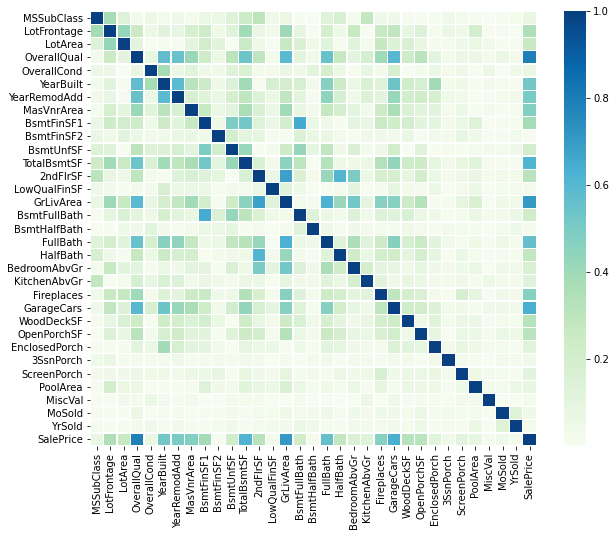

In [9]:
# Correlation matrix with absolute vals
correlation_mat = df.corr().abs()
# Selecting upper triangle of correlation matrix
upper = correlation_mat.where(np.triu(np.ones(correlation_mat.shape), 
                                  k=1).astype(np.bool))
# Finding the features with correlation greater than 0.80
to_drop = [column for column in upper.columns if any(
        upper[column] > 0.80)]
# Dropping those features 
df = df.drop(to_drop, axis=1)

# New correlation matrix with absolute vals with dummy variables
correlation_mat = df.corr().abs()
# Correlation matrix heat map
plt.figure(figsize=(10,8))
sns.heatmap(correlation_mat, annot = False, linewidths=.3, cmap ="GnBu")
plt.show()

In [10]:
# Creating the dummy variables for categorical features and
# avoiding the dummy variable trap by setting drop_first parameter as True.
df = pd.get_dummies(df, columns = categorical, drop_first=True)

In [11]:
# Filling the missing values with mean values
for col in df.columns:
    df[col] = df[col].fillna(df[col].mean()) 

In [12]:
# Removing duplicates if exists
df = df.drop_duplicates()

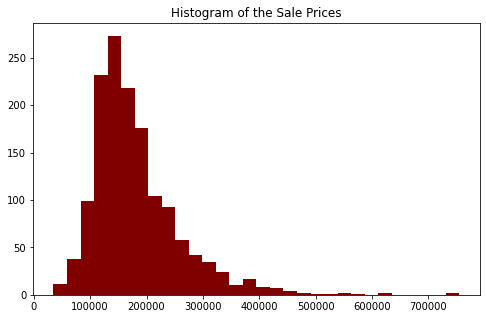

In [13]:
# Histogram of SalePrice column
plt.figure(figsize=(8,5))
plt.hist(df['SalePrice'], bins = 30, color = 'maroon')
plt.title('Histogram of the Sale Prices')
plt.show()

In [14]:
df.shape

(1460, 240)

In [15]:
X = df.drop(['SalePrice'], axis =1)
Y = df['SalePrice']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
testSize = 0.2
x_train, x_test, y_train, y_test = train_test_split(
        X, Y, test_size=testSize, random_state = 4)

In [18]:
from xgboost import XGBRegressor

In [19]:
xgb = XGBRegressor(n_estimators = 100, max_depth=3,
                  objective='reg:squarederror')
xgb.fit(x_train,y_train)
prediction = xgb.predict(x_test)

In [20]:
from xgboost import plot_importance

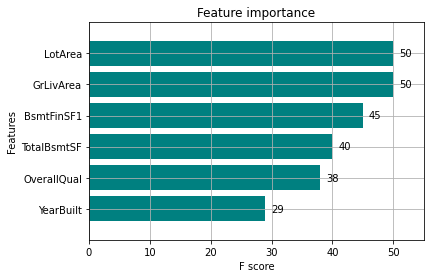

In [21]:
# Most important features
plot_importance(xgb, height=.8,max_num_features = 6, color = 'teal')
plt.show()

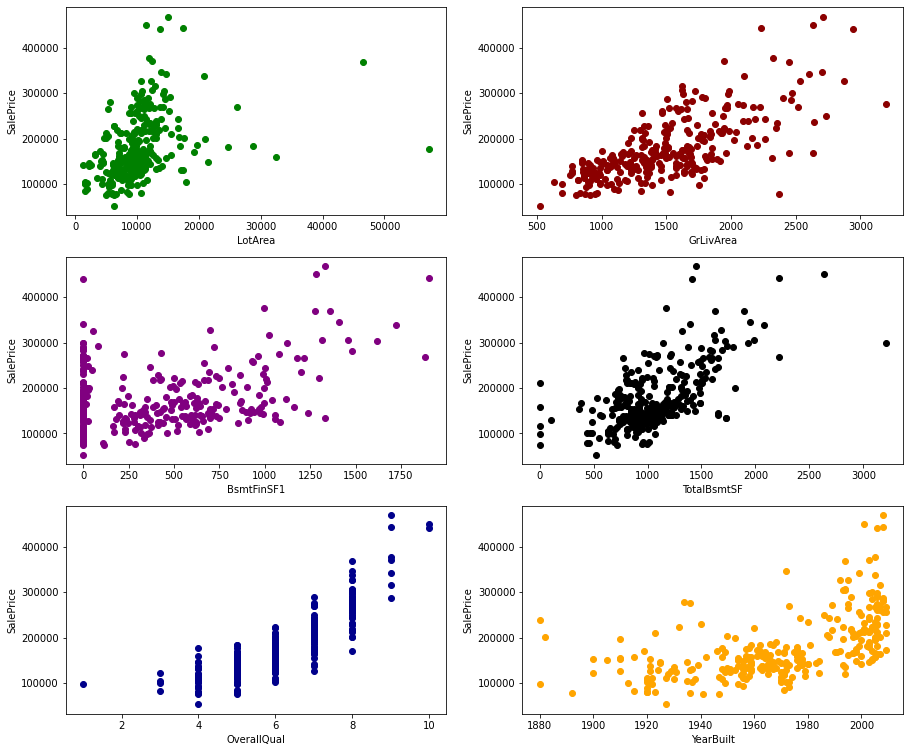

In [22]:
plt.figure(figsize=(15,13))

plt.subplot(321)
plt.scatter(x_test['LotArea'], prediction, color = 'green')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')

plt.subplot(322)
plt.scatter(x_test['GrLivArea'], prediction, color = 'darkred')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

plt.subplot(323)
plt.scatter(x_test['BsmtFinSF1'], prediction, color = 'purple')
plt.xlabel('BsmtFinSF1')
plt.ylabel('SalePrice')

plt.subplot(324)
plt.scatter(x_test['TotalBsmtSF'], prediction, color = 'black')
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')

plt.subplot(325)
plt.scatter(x_test['OverallQual'], prediction, color = 'darkblue')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')

plt.subplot(326)
plt.scatter(x_test['YearBuilt'], prediction, color = 'orange')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')

plt.show()

In [23]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score

In [24]:
rmse  = np.sqrt(mean_squared_error(y_test, prediction))
rmsle = np.sqrt(mean_squared_log_error(y_test, prediction))
r2 = r2_score(y_test,prediction)

print("RMSE  :", rmse)
print("RMSLE :", rmsle)
print("R²    :", r2)

RMSE  : 23740.83676620641
RMSLE : 0.12517258654018154
R²    : 0.8984823507290228
